#Importacion de librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

In [ ]:
#para combertir porsteriormente en una lsita los directorios
import os

#Extracción del archivo comprimido

In [ ]:
!unzip archive.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train_dataset/train/GuideSign/01075.jpg  
  inflating: train_dataset/train/GuideSign/01076.jpg  
  inflating: train_dataset/train/GuideSign/01077.jpg  
  inflating: train_dataset/train/GuideSign/01078.jpg  
  inflating: train_dataset/train/GuideSign/01080.jpg  
  inflating: train_dataset/train/GuideSign/01081.jpg  
  inflating: train_dataset/train/GuideSign/01082.jpg  
  inflating: train_dataset/train/GuideSign/01083.jpg  
  inflating: train_dataset/train/GuideSign/01084.jpg  
  inflating: train_dataset/train/GuideSign/01085.jpg  
  inflating: train_dataset/train/GuideSign/01086.jpg  
  inflating: train_dataset/train/GuideSign/01087.jpg  
  inflating: train_dataset/train/GuideSign/01088.jpg  
  inflating: train_dataset/train/GuideSign/01089.jpg  
  inflating: train_dataset/train/GuideSign/01090.jpg  
  inflating: train_dataset/train/GuideSign/01091.jpg  
  inflating: train_dataset/train/GuideSign/01092.jpg  
  in

In [ ]:
train_path = "/content/train_dataset/train"
test_path = "/content/test_dataset/test"
labels= os.listdir(train_path)
n_labels= len(labels)

In [ ]:
labels

['W1', 'M4', 'M7', 'P1', 'M6', 'P12', 'M5', 'P10_50', 'GuideSign', 'M1']

In [ ]:
batch_sizes=[1,2,4,16,32,64]
epochs=[x for x in range(1,51)]
splits=[0.2,0.3,0.4]
# El split ahce referecia a la distribucion frente a la particion para valdiacion

In [ ]:
dimensiones1={"HEIGH":5 ,"WEIGHT":5}
dimensiones2={"HEIGH":5 ,"WEIGHT":5}


#Crear Datasets

In [ ]:

def generar_datsets(train,test,split,batch):
  train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=splits[0])
  train_data_generator = train_data_gen.flow_from_directory(train,target_size = (32,32),color_mode="rgb",batch_size = batch,subset = "training",class_mode = "categorical",shuffle = True)

  #validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
  validation_data_genator=train_data_gen.flow_from_directory(train,target_size = (32,32),color_mode="rgb",batch_size = batch,subset = "validation",class_mode = "categorical",shuffle = True)

  test_data_gen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
  test_data_generator= test_data_gen.flow_from_directory(test,target_size = (32,32),batch_size = batch,class_mode = "categorical",shuffle = True)
  return train_data_generator,test_data_generator,validation_data_genator

In [ ]:
#Tomamos un batchsize de 16  para ....
datagen=generar_datsets(train_path,test_path,splits[1],batch_sizes[4])

Found 4823 images belonging to 10 classes.
Found 1201 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


#Creacion de de modelo 1

In [ ]:
def modelo1(train_dataset,test_dataset,validation_dataset,pixel):
  # Inicializar la CNN
  classifier = tf.keras.Sequential()
  #1) Capa convolucional
  capa1=Conv2D(filters = 32,
              padding='same',
              kernel_size = (5, 5),
              use_bias=1,
              input_shape = (pixel, pixel, 3),
              activation = "relu")
  #2) Capa de Maxppolin
  capa2=MaxPooling2D(pool_size = (5,5))
  # 3) Dropaout
  capa3=Dropout(0.25)
  #4) Capa de Flatten
  capa4=Flatten()
  #5) Full conection
  capa5=Dense(100, use_bias=1, activation = "relu")
  #6) Capa de Salida
  capa6=Dense(10, use_bias=1, activation = "softmax")

  #Armado de la red neuronal
  classifier.add(capa1)
  classifier.add(capa2)
  classifier.add(capa2)
  classifier.add(capa4)
  classifier.add(capa5)
  classifier.add(capa6)

  classifier.summary()

  return classifier

In [ ]:
 modelo_1=modelo1(datagen[0],datagen[1],datagen[2],32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 100)               3300      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6742 (26.34 KB)
Trainable params: 6742 (26.34 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

#Creacion del modelo 2

### Para la construcción del clasificador la red neuronal en un segundo parámetro de
configuración deberá contar con las siguiente especificaciones


*   Capa convolucional con 48 detectores de características, tamaño de kernel de 3x3, funcion de activación lineal rectificada (ReLU) de paso 1 y con panding.
*   Capa de max pooling de tamaño 2x2
*   Capa convolucional con 96 detectores de características, tamaño de kernel de
3x3, funcion de activación lineal rectificada (ReLU) de paso 1 y con panding.
*   Capa de max pooling de tamaño 2x2
*   Capa de Flattening
*   Capa full conectada con 100 neuronas y funcion de activación lineal
rectificada (ReLU)


*   Capa full conectada con 100 neuronas y funcion de activación lineal rectificada (ReLU)

*  Capa de salida del mismo numero de las clases a clasificar y función de
activación softmax.














In [ ]:
def modelo2(train_dataset,test_dataset,validation_dataset,pixel):
  # Inicializar la CNN
  classifier = tf.keras.Sequential()
  #1) Capa convolucional
  capa1=Conv2D(filters = 48,
              padding='same',
              kernel_size = (3, 3),
              use_bias=1,
              input_shape = (pixel, pixel, 3),
              activation = "relu")
  #2) Capa de Maxppolin
  capa2=MaxPooling2D(pool_size = (2,2))
  # 3) Dropaout
  capa3=Dropout(0.25)
  #4) 2 Capa covolucional
  capa4=Conv2D(filters = 96,
              padding='same',
              kernel_size = (3, 3),
              use_bias=1,
              input_shape = (pixel, pixel, 3),
              activation = "relu")
  # 5) argramos otra capa de maxpooling
  capa5=MaxPooling2D(pool_size = (2,2))
  # 6) Agrgamso otra capa de dropoout
  capa6=Dropout(0.25)
  # 7) agrgamos una capa de Flatten
  capa7=Flatten()
  #8) Full conection
  capa8=Dense(100, use_bias=1, activation = "relu")
  capa9=Dense(100, use_bias=1, activation = "relu")
  #9) Capa de Salida
  capa10=Dense(10, use_bias=1, activation = "softmax")


  classifier.add(capa1)
  classifier.add(capa2)
  classifier.add(capa2)
  classifier.add(capa4)
  classifier.add(capa5)
  classifier.add(capa6)
  classifier.add(capa7)
  classifier.add(capa8)
  classifier.add(capa9)
  classifier.add(capa10)

  classifier.summary()
  return classifier


In [ ]:
modelo_2=modelo2(datagen[0],datagen[1],datagen[2],32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 96)          41568     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 96)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1536)             

#Compliacion de los modelos

In [ ]:
def Compilacion(modelo1,modelo2):
    #compilaciond de los modelos
    #'f1_score', 'recall
    modelo1.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=['acc', tf.keras.metrics.Precision(name="precision"),tf.keras.metrics.F1Score( name="f1_score"),tf.keras.metrics.Recall(name="recall")],run_eagerly=True)
    modelo2.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=['acc',tf. keras.metrics.Precision(name="precision") ,tf.keras.metrics.F1Score( name="f1_score"),tf.keras.metrics.Recall(name="recall")],run_eagerly=True)

In [ ]:
Compilacion(modelo_1,modelo_2)

In [ ]:
pasostrain1=datagen[0].n//datagen[0].batch_size
pasosvalidation1=datagen[2].n//datagen[2].batch_size



In [ ]:

 cnn=modelo_1.fit(datagen[0],epochs=10, steps_per_epoch=pasostrain1,validation_data=(datagen[2]),validation_steps=pasosvalidation1,shuffle=True)

Epoch 1/10
150/150 [==============================] - 22s 146ms/step - loss: 1.4831 - acc: 0.5475 - precision: 0.7072 - f1_score: 0.0943 - recall: 0.3519 - val_loss: 1.2125 - val_acc: 0.6419 - val_precision: 0.8720 - val_f1_score: 0.1406 - val_recall: 0.4257
Epoch 2/10
150/150 [==============================] - 22s 146ms/step - loss: 1.1017 - acc: 0.6441 - precision: 0.8091 - f1_score: 0.2171 - recall: 0.5078 - val_loss: 1.0006 - val_acc: 0.6833 - val_precision: 0.8604 - val_f1_score: 0.2691 - val_recall: 0.5414
Epoch 3/10
150/150 [==============================] - 21s 140ms/step - loss: 0.9439 - acc: 0.6892 - precision: 0.8328 - f1_score: 0.3032 - recall: 0.5729 - val_loss: 0.8752 - val_acc: 0.7272 - val_precision: 0.8473 - val_f1_score: 0.4081 - val_recall: 0.5811
Epoch 4/10
150/150 [==============================] - 23s 150ms/step - loss: 0.8597 - acc: 0.7163 - precision: 0.8450 - f1_score: 0.3991 - recall: 0.6007 - val_loss: 0.8041 - val_acc: 0.7416 - val_precision: 0.8568 - val_f1

In [ ]:
 cnn2=modelo_2.fit(datagen[0],epochs=10, steps_per_epoch=pasostrain1,validation_data=(datagen[2]),validation_steps=pasosvalidation1,shuffle=True)

Epoch 1/10
150/150 [==============================] - 29s 193ms/step - loss: 1.0688 - acc: 0.6518 - precision: 0.7978 - f1_score: 0.3301 - recall: 0.5264 - val_loss: 0.7153 - val_acc: 0.7762 - val_precision: 0.8341 - val_f1_score: 0.4978 - val_recall: 0.7221
Epoch 2/10
150/150 [==============================] - 26s 173ms/step - loss: 0.5271 - acc: 0.8368 - precision: 0.8974 - f1_score: 0.6681 - recall: 0.7687 - val_loss: 0.3933 - val_acc: 0.8657 - val_precision: 0.9176 - val_f1_score: 0.7233 - val_recall: 0.8463
Epoch 3/10
150/150 [==============================] - 27s 179ms/step - loss: 0.3946 - acc: 0.8821 - precision: 0.9156 - f1_score: 0.7992 - recall: 0.8472 - val_loss: 0.3334 - val_acc: 0.9012 - val_precision: 0.9240 - val_f1_score: 0.8412 - val_recall: 0.8725
Epoch 4/10
150/150 [==============================] - 25s 168ms/step - loss: 0.3019 - acc: 0.9082 - precision: 0.9318 - f1_score: 0.8447 - recall: 0.8873 - val_loss: 0.3075 - val_acc: 0.9062 - val_precision: 0.9352 - val_f1

In [ ]:
'''def Entrenamiento(modelo,epocas,datagen):
    pasostrain1=datagen[0].n//datagen[0].batch_size
    print(pasostrain1)
    pasosvalidation1=datagen[2].n//datagen[2].batch_size

    pasost= pasostrain1
    pasosv= pasosvalidation1

    cnn=modelo.fit(datagen[0],
               epochs=epocas,
               steps_per_epoch=pasost,
               validation_data=(datagen[2]),
               validation_steps=pasosv,
               shuffle=True)

    return cnn'''

SyntaxError: incomplete input (<ipython-input-25-5f3758889061>, line 1)

#Analisis de Resultados Modelo1

## Accuracy and Loss graphics

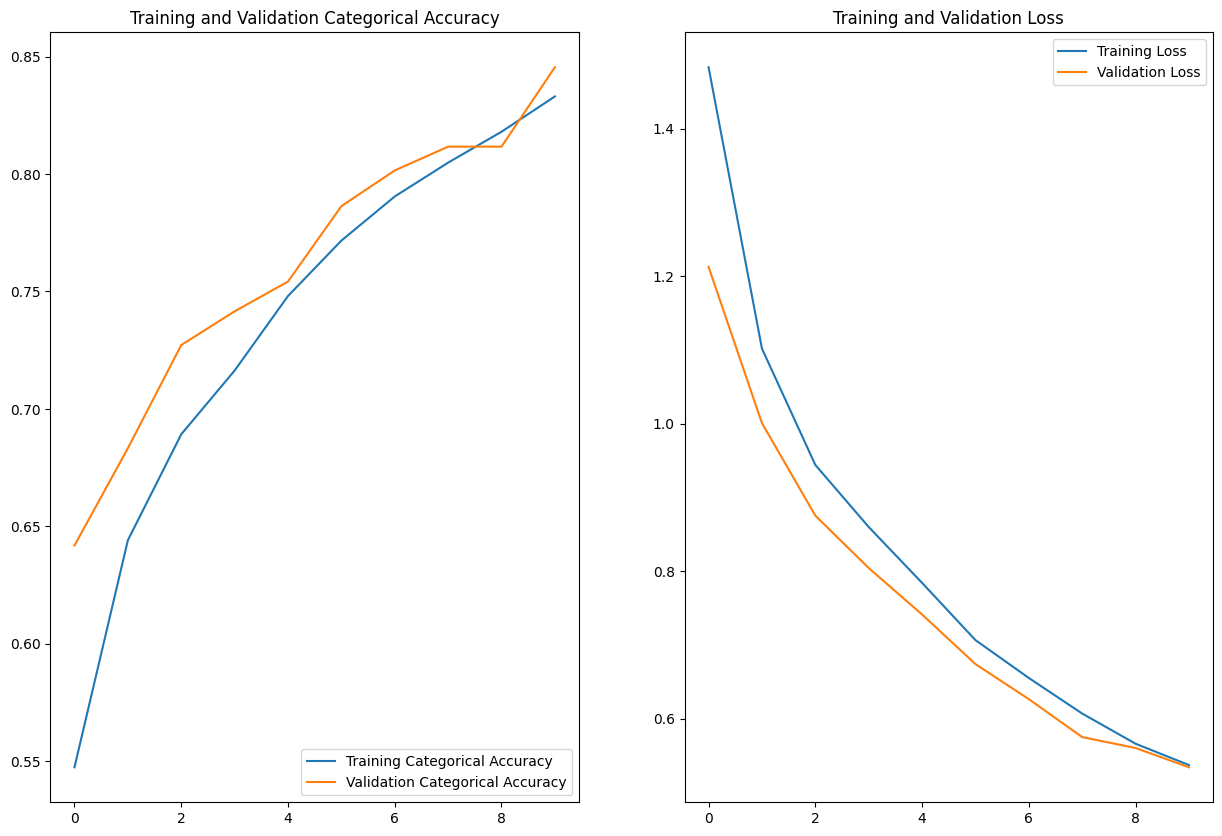

In [ ]:
acc = cnn.history['acc']
val_acc = cnn.history['val_acc']
loss = cnn.history['loss']

val_loss = cnn.history['val_loss']
epochs_range = range(len(cnn.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Categorical Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Categorical Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Categorical Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## F1 and recall

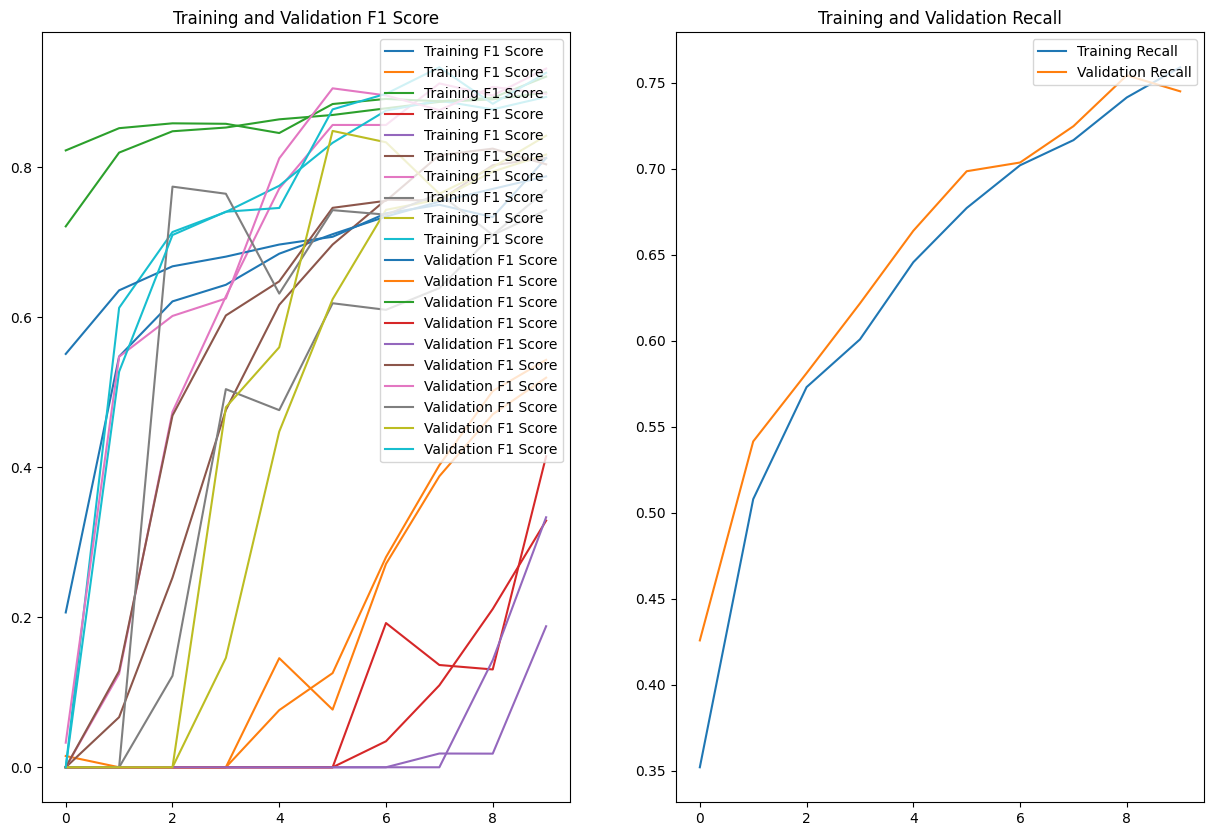

In [ ]:
trian_f1=cnn.history['f1_score']
validation_f1=cnn.history['val_f1_score']


train_recall=cnn.history['recall']
validation_recall=cnn.history['val_recall']


plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range,train_f1, label='Training F1 Score')
plt.plot(epochs_range,validation_f1, label='Validation F1 Score')
plt.legend(loc='upper right')
plt.title('Training and Validation F1 Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_recall , label='Training Recall')
plt.plot(epochs_range, validation_recall, label='Validation Recall')
plt.legend(loc='upper right')
plt.title('Training and Validation Recall')
plt.show()

##Precision

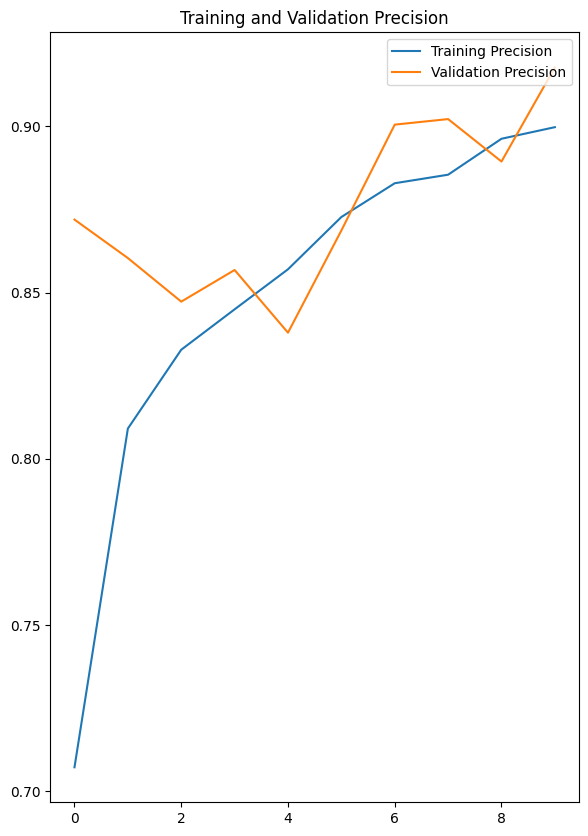

In [ ]:
train_p=cnn.history['precision']
validation_p=cnn.history['val_precision']
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_p , label='Training Precision')
plt.plot(epochs_range, validation_p, label='Validation Precision')
plt.legend(loc='upper right')
plt.title('Training and Validation Precision')
plt.show()

##Metricas de test del modelo 1

In [ ]:
scores=modelo_1.evaluate(datagen[1],steps=pasosvalidation1)
scores

10/37 [=======>......................] - ETA: 1s - loss: 0.5752 - acc: 0.8406 - precision: 0.9316 - f1_score: 0.7241 - recall: 0.7656

37/37 [==============================] - 1s 17ms/step - loss: 0.5819 - acc: 0.8395 - precision: 0.9286 - f1_score: 0.7236 - recall: 0.7623


[0.5819050073623657,
 0.8395061492919922,
 0.9285714030265808,
 array([0.81159425, 0.45454547, 0.9014926 , 0.45454547, 0.        ,
        0.83018863, 0.93333334, 0.90909094, 1.        , 0.94117653],
       dtype=float32),
 0.7623456716537476]

## Matriz de confunsion modelo 1

###Conjunto de predicciones modelo1

In [ ]:
predicciones1 = modelo_1.predict(datagen[2])
y_pred_df = pd.DataFrame(predicciones1)
y_pred_df=np.round(y_pred_df)
y_pred_df

38/38 [==============================] - 2s 53ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1199,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### datos correctos

In [ ]:
data_correcta=datagen[2].classes
y_test_df = pd.DataFrame(data_correcta)
y_test_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1196,9
1197,9
1198,9
1199,9


###Etiquetas

In [ ]:
etiquetas = list(datagen[2].class_indices.keys())
etiquetas

['GuideSign', 'M1', 'M4', 'M5', 'M6', 'M7', 'P1', 'P10_50', 'P12', 'W1']

### Matriz modelo1

In [ ]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_pred_df, y_test_df)
print(cm1)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

#Analisis de resultado Modelo2

###Accuracy and Loss graphics

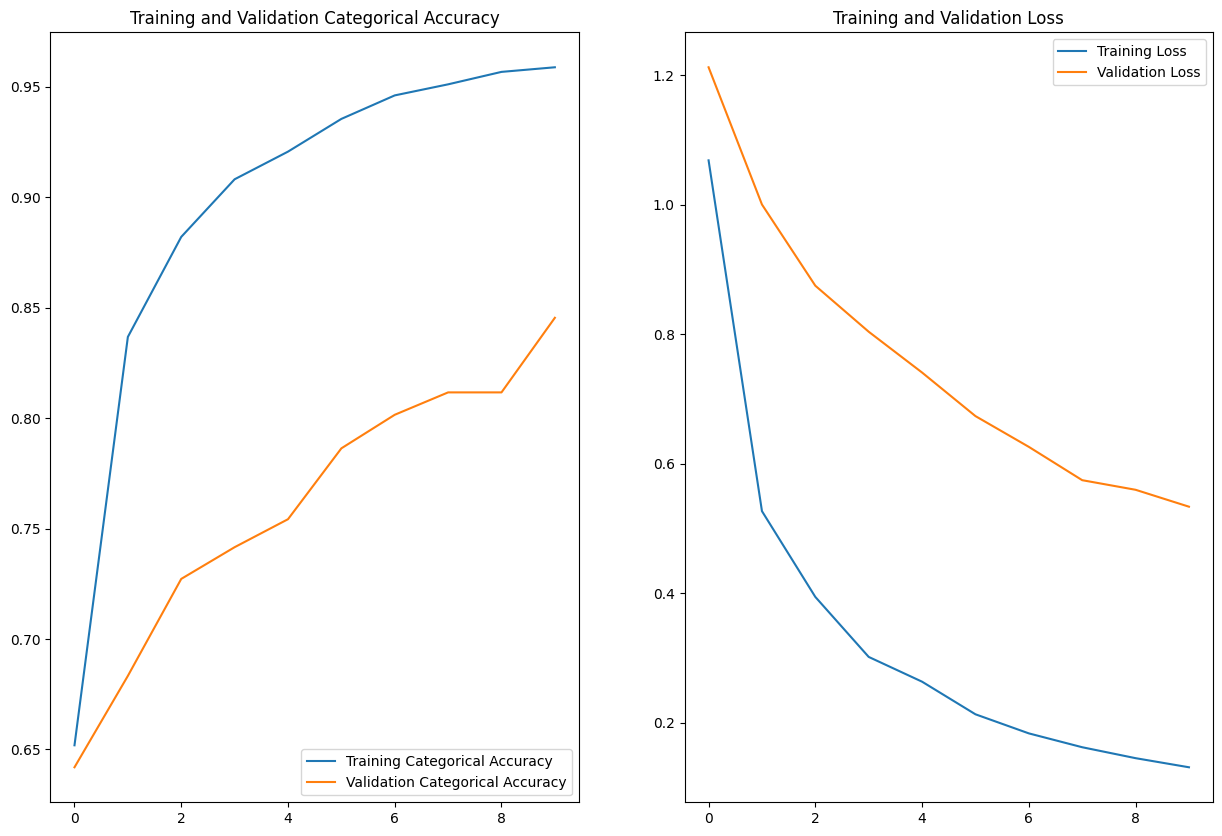

In [ ]:
acc2 = cnn2.history['acc']
val_acc2 = cnn2.history['val_acc']
loss2 = cnn2.history['loss']

val_loss2 = cnn.history['val_loss']
epochs_range = range(len(cnn.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Categorical Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Categorical Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Categorical Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## F1 and recall

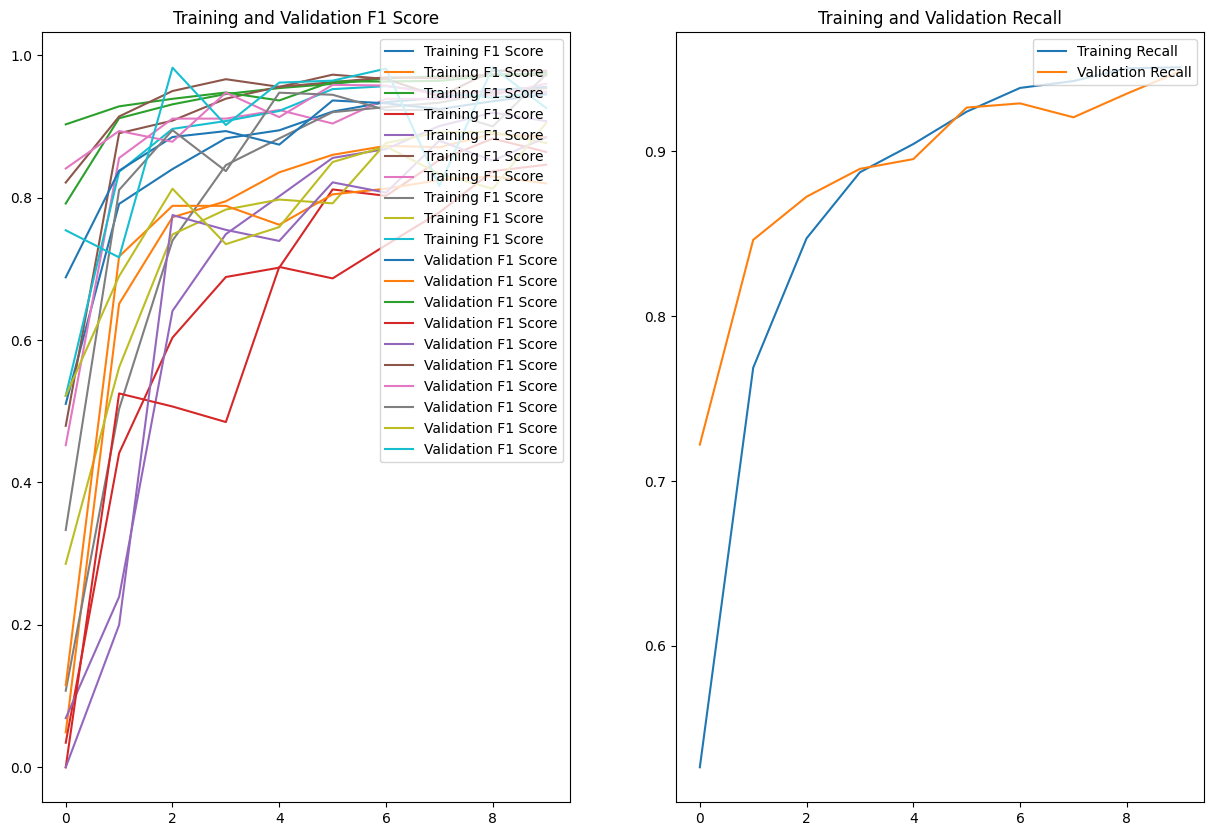

In [ ]:
train_f2=cnn2.history['f1_score']
validation_f2=cnn2.history['val_f1_score']


train_recall2=cnn2.history['recall']
validation_recall2=cnn2.history['val_recall']


plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range,train_f2, label='Training F1 Score')
plt.plot(epochs_range,validation_f2, label='Validation F1 Score')
plt.legend(loc='upper right')
plt.title('Training and Validation F1 Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_recall2 , label='Training Recall')
plt.plot(epochs_range, validation_recall2, label='Validation Recall')
plt.legend(loc='upper right')
plt.title('Training and Validation Recall')
plt.show()

###Precision

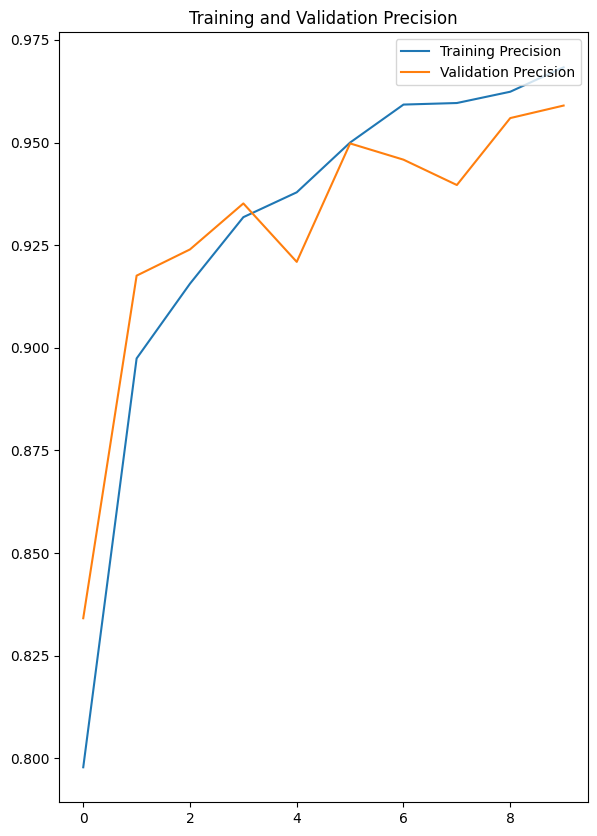

In [ ]:
train_p2=cnn2.history['precision']
validation_p2=cnn2.history['val_precision']
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_p2 , label='Training Precision')
plt.plot(epochs_range, validation_p2, label='Validation Precision')
plt.legend(loc='upper right')
plt.title('Training and Validation Precision')
plt.show()

##Metricas de test del modelo 2



In [ ]:
scores=modelo_2.evaluate(datagen[1],steps=pasosvalidation1)
scores

10/37 [=======>......................] - ETA: 1s - loss: 0.1782 - acc: 0.9625 - precision: 0.9654 - f1_score: 0.9425 - recall: 0.9594

37/37 [==============================] - 1s 19ms/step - loss: 0.1760 - acc: 0.9630 - precision: 0.9658 - f1_score: 0.9427 - recall: 0.9599


[0.17603537440299988,
 0.9629629850387573,
 0.9658384919166565,
 array([0.96874994, 0.8148148 , 0.9702381 , 1.        , 0.7692308 ,
        0.98039216, 1.        , 1.        , 0.9230769 , 1.        ],
       dtype=float32),
 0.959876537322998]